# Jobsheet 3 : Regression

## Praktikum 1

### Step 2 : Import libraries

In [51]:
# For data manipulation
import pandas as pd 
import numpy as np 

# For data visiualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# For model building
import statsmodels.api as sm
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR

### Step 3 : Load Dataset

In [20]:
df = pd.read_csv('./Dataset/dataset.csv')

### Step 4 : Data Preprocessing

In [21]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\r\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\r\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\r\nCobbborough,...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\r\nPort Jason, OH 22070-...",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\r\nPort Jacobville, PR...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [22]:
df.shape

(500, 8)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [24]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Step 5 : Data Visualization

#### Pairplot

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


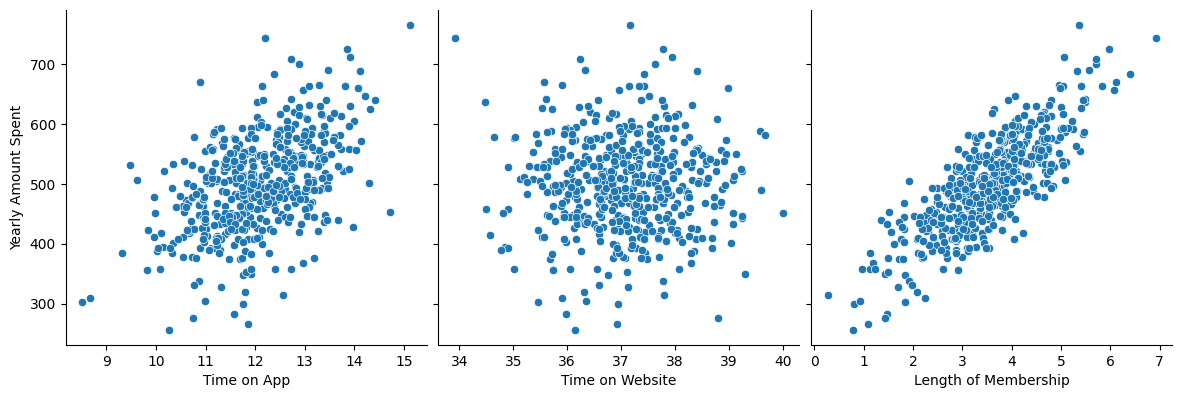

In [25]:
sns.pairplot(df, x_vars=['Time on App', 'Time on Website', 'Length of Membership'], y_vars='Yearly Amount Spent', size=4, aspect=1, kind='scatter')

#### Heatmap

<Axes: >

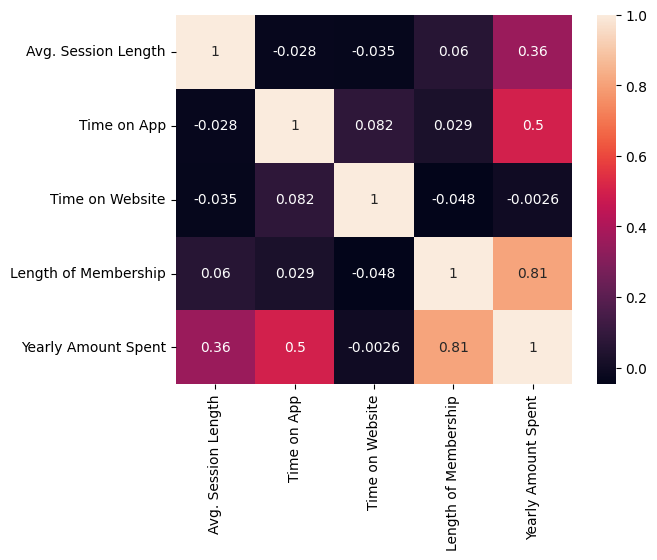

In [26]:
corr = df[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership', 'Yearly Amount Spent']].corr()
sns.heatmap(corr, annot=True)

### Step 6 : Linear Regression

In [27]:
x = df['Length of Membership']
y = df['Yearly Amount Spent']

#### Splitting the data

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

#### Training the model

In [29]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

#### Visualize the regression line

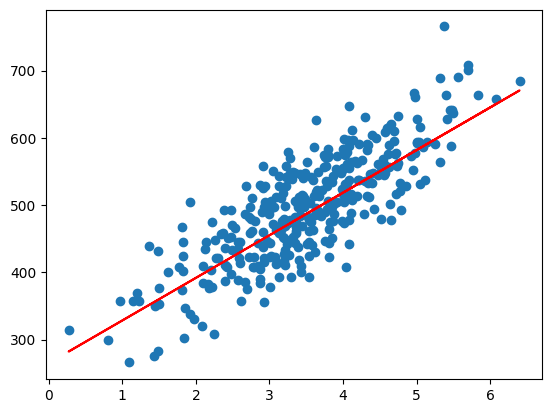

In [30]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 265.2483 + 63.3015*x_train, 'r')
plt.show()

### Step 7 : Residual Analysis

In [31]:
y_train_pred = lr.predict(x_train_sm)

res = (y_train - y_train_pred)

#### Visualize the residual plot

<Figure size 640x480 with 0 Axes>

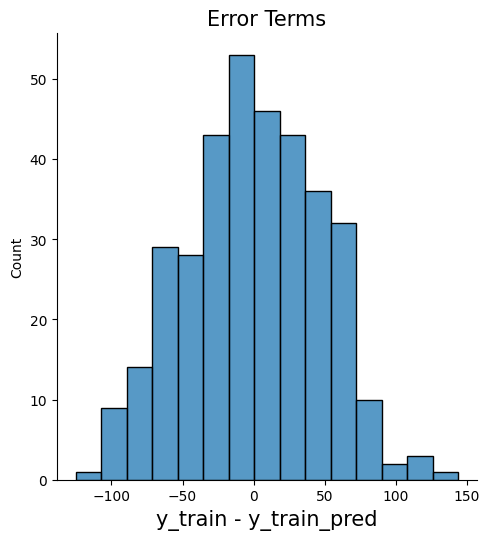

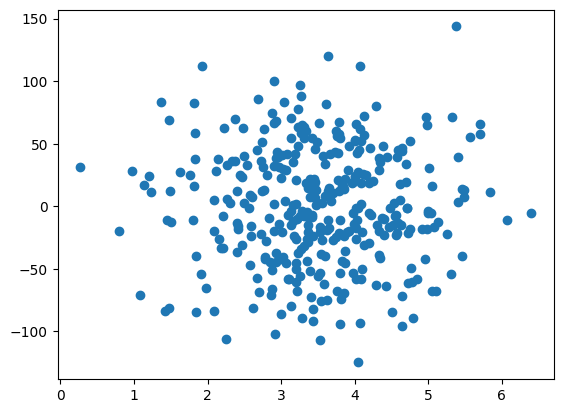

In [32]:
fig = plt.figure()
sns.displot(res, bins=15)
plt.title('Error Terms', fontsize=15)
plt.xlabel('y_train - y_train_pred', fontsize=15)
plt.show()

plt.scatter(x_train, res)
plt.show()

### Step 8 : Predict Test Data and Evaluate the Model

In [33]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)

#### Predict test data

In [35]:
r_squared = r2_score(y_test, y_test_pred)

### Step 9 : Visualize the test set result

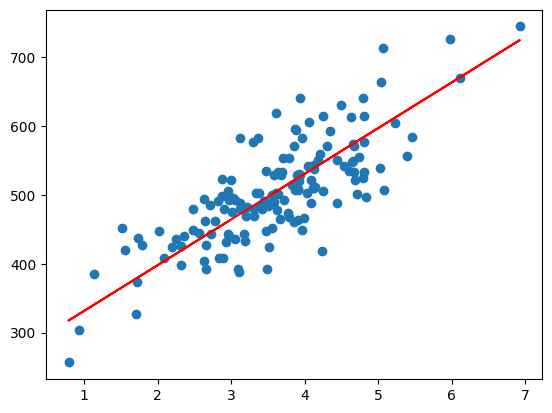

In [36]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()

## Praktikum 2

### Step 2 : Load dataset

In [38]:
data = pd.read_csv('./Dataset/Posisi_gaji.csv')
data.head()

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [39]:
x = data.iloc[:, 1:2].values
y = data.iloc[:, 2].values

In [41]:
data

,Posisi,Level,Gaji
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


### Step 3 : Feature Scalling

In [43]:
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x.reshape(-1, 1))
y = sc_y.fit_transform(y.reshape(-1, 1))

### Step 4 : Fitting SVR to the dataset

In [45]:
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

/home/ubuntu/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Step 5 : Visualize the SVR result

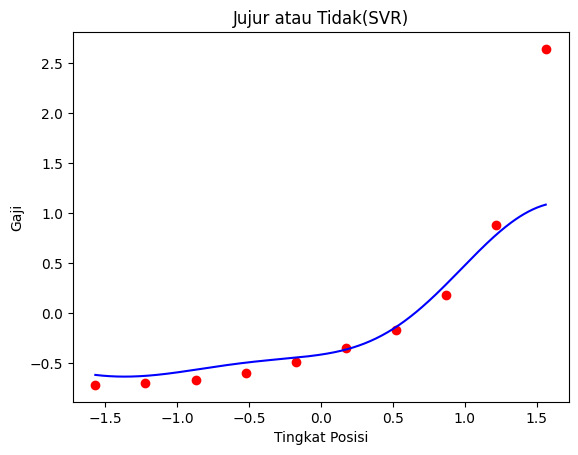

In [46]:
x_grid = np.arange(min(x), max(x), 0.01).reshape(-1, 1)
plt.scatter(x, y, color='red')
plt.plot(x_grid, regressor.predict(x_grid), color='blue')
plt.title('Jujur atau Tidak(SVR)')
plt.xlabel('Tingkat Posisi')
plt.ylabel('Gaji')
plt.show()

### Step 6 : Predict a new result

In [49]:
tingkat_posisi_prediksi = np.array([[6.5]])
tingkat_posisi_prediksi = sc_x.transform(tingkat_posisi_prediksi)
gaji_prediksi = regressor.predict(tingkat_posisi_prediksi)
gaji_prediksi = sc_y.inverse_transform(gaji_prediksi.reshape(-1, 1))

### Step 7 : Visualize the SVR result (for higher resolution and smoother curve)

In [50]:
print("Prediksi Gaji untuk Tingkat Posisi 6.5:", gaji_prediksi[0])

Prediksi Gaji untuk Tingkat Posisi 6.5: [170370.0204065]


### Step 8 : Evaluating the model performance

In [52]:
y_actual = sc_y.inverse_transform(y)
y_pred = regressor.predict(x)

mae = mean_absolute_error(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_actual, y_pred)

print(f'Mean Absolute Error Values: {mae}')
print(f'Mean Squared Error Values: {mse}')
print(f'Root Mean Squared Error Values: {rmse}')
print(f'R2 Score: {r2}')

Mean Absolute Error Values: 249500.11150357974
Mean Squared Error Values: 142912240625.2814
Root Mean Squared Error Values: 378037.3534788347
R2 Score: -0.7717363528203269
